# Comparison with the results of [Grabert et al, 2016](https://www.nature.com/articles/nn.4222#methods)

Data of [Grabert et al, 2016](https://www.nature.com/articles/nn.4222#methods): Affymetrix probes

# Loads

## Libraries and functions

In [1]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”Warning message in rsqlite_fetch(res@ptr, n = n):
“Don't need to call dbFetch() for statements, only for queries”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [2]:
source("functions.R")

## Data

In [3]:
load("../results/dge/norm_counts.RData")

Get the data from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE62420 and clean it:
1. Remplace some columns names (the ones with GEO id) by more meaningful names (from their description on GEO page)
2. Transform the Affymetrix probe set names into a Gene symbol
3. Conserve only the probes with a corresponding gene symbol
4. Aggregate by gene symbol (several probes corresponding to the same gene symbol) by summing


In [4]:
# Download from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE62420
dest = "../data/GSE62420_Normalization_all_ages_microglia.txt.gz"
download.file("https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE62420&format=file&file=GSE62420%5FNormalization%5Fall%5Fages%5Fmicroglia%2Etxt%2Egz",
              dest)
# Import the data
GSE62420 = read.table(gzfile(dest), h = T, row.names = 1)
head(GSE62420)
dim(GSE62420)

,GSM1526783,GSM1526784,GSM1526785,GSM1526786,GSM1526787,GSM1526788,GSM1526789,GSM1526790,GSM1526791,GSM1526792,⋯,Cortex_22mo_3,Cortex_22mo_4,Hippocampus_22mo_1,Hippocampus_22mo_2,Hippocampus_22mo_3,Hippocampus_22mo_4,Striatum_22mo_1,Striatum_22mo_2,Striatum_22mo_3,Striatum_22mo_4
1415670_PM_at,387.3683,391.6673,431.4346,400.4036,427.2190,514.9716,452.2996,445.5125,466.1453,389.0813,⋯,485.7688,464.0190,404.1671,389.6902,423.9781,420.5475,437.0904,460.4977,460.2724,486.1127
1415671_PM_at,1735.6376,1613.0998,1640.5456,1669.0136,1722.0484,1712.7513,1751.7000,1920.7579,1707.0268,1772.1193,⋯,2002.0607,1874.5648,1890.7462,1789.0649,1833.7738,1817.0218,1947.3277,1765.9393,1827.3028,1964.9542
1415672_PM_at,1526.5509,1601.9795,1670.6456,1485.7545,1570.7523,1655.6247,1576.0526,1513.5179,1714.5449,1503.1674,⋯,1534.3054,1584.2014,1475.5530,1377.8375,1313.6179,1495.2593,1508.6579,1439.8971,1351.2042,1513.0039
1415673_PM_at,153.6912,150.6498,148.1479,146.5690,184.2991,189.4895,198.3145,188.9261,191.2049,166.3939,⋯,184.4313,188.2473,213.0737,171.0023,191.6124,177.8685,247.5043,286.7994,259.3634,272.4032
1415674_PM_a_at,837.2067,877.1617,856.4368,772.6917,823.2587,843.3443,921.5751,824.7019,663.9768,738.1054,⋯,865.0046,838.5541,769.1899,729.0995,742.1798,791.5590,894.2857,834.5294,845.7163,931.1792
1415675_PM_at,401.6269,387.8863,372.3875,376.6044,470.8791,525.0303,549.9669,534.9825,400.0374,410.7091,⋯,507.7868,507.8406,467.7916,424.9449,434.1314,458.8125,535.1639,473.3157,514.8856,555.2555


[1] 45141    48

In [5]:
# Rename samples with GEO ids given their description on GEO page
samples = colnames(GSE62420)
samples = replace(samples, samples == 'GSM1526783', "Cerebellum_4mo_1")
samples = replace(samples, samples == 'GSM1526784', "Cerebellum_4mo_2")
samples = replace(samples, samples == 'GSM1526785', "Cerebellum_4mo_3")
samples = replace(samples, samples == 'GSM1526786', "Cerebellum_4mo_4")
samples = replace(samples, samples == 'GSM1526787', "Cortex_4mo_1")
samples = replace(samples, samples == 'GSM1526788', "Cortex_4mo_2")
samples = replace(samples, samples == 'GSM1526789', "Cortex_4mo_3")
samples = replace(samples, samples == 'GSM1526790', "Cortex_4mo_4")
samples = replace(samples, samples == 'GSM1526791', "Hippocampus_4mo_1")
samples = replace(samples, samples == 'GSM1526792', "Hippocampus_4mo_2")
samples = replace(samples, samples == 'GSM1526793', "Hippocampus_4mo_3")
samples = replace(samples, samples == 'GSM1526794', "Hippocampus_4mo_4")
samples = replace(samples, samples == 'GSM1526795', "Striatum_4mo_1")
samples = replace(samples, samples == 'GSM1526796', "Striatum_4mo_2")
samples = replace(samples, samples == 'GSM1526797', "Striatum_4mo_3")
samples = replace(samples, samples == 'GSM1526798', "Striatum_4mo_4")
colnames(GSE62420) = samples

In [6]:
GSE62420_metadata = t(sapply(sapply(colnames(GSE62420), strsplit, split = "_"), unlist))
GSE62420_metadata = as.data.frame(GSE62420_metadata)
colnames(GSE62420_metadata) = c("region", "age", "replicate")
GSE62420_metadata

,region,age,replicate
Cerebellum_4mo_1,Cerebellum,4mo,1
Cerebellum_4mo_2,Cerebellum,4mo,2
Cerebellum_4mo_3,Cerebellum,4mo,3
Cerebellum_4mo_4,Cerebellum,4mo,4
Cortex_4mo_1,Cortex,4mo,1
Cortex_4mo_2,Cortex,4mo,2
Cortex_4mo_3,Cortex,4mo,3
Cortex_4mo_4,Cortex,4mo,4
Hippocampus_4mo_1,Hippocampus,4mo,1
Hippocampus_4mo_2,Hippocampus,4mo,2


In [7]:
# Correspondance between Affymetrix probe set and Gene symbol
aff2symbol = get_list(moe430aSYMBOL)
# Remove the _PM from the list of Affymetrix probes
probes = gsub("_PM","", rownames(GSE62420))
# Check the probes with a corresponding gene symbol
probes_in = probes %in% names(aff2symbol)
# Inspect the non conserved probes
probes_not_in = probes[!probes_in]
head(probes_not_in)

[1] "1415701_x_at" "1415716_a_at" "1415733_a_at" "1415764_at"   "1415788_at"  
[6] "1415789_a_at"

In [8]:
# Conserve the probes with a corresponding gene symbol
GSE62420_2 = GSE62420[probes_in, ]
rownames(GSE62420_2) = probes[probes_in]
# Extract the gene symbol
symb = sapply(rownames(GSE62420_2), function(x) aff2symbol[[x]])
length(symb)
length(unique(symb))
# Aggregate by gene symbol
GSE62420_genes = aggregate(GSE62420_2, by = list(symb), FUN = sum)
rownames(GSE62420_genes) = GSE62420_genes[,"Group.1"]
GSE62420_genes[,"Group.1"] = NULL
dim(GSE62420_genes)
head(GSE62420_genes)

[1] 21248

[1] 13010

[1] 13010    48

,Cerebellum_4mo_1,Cerebellum_4mo_2,Cerebellum_4mo_3,Cerebellum_4mo_4,Cortex_4mo_1,Cortex_4mo_2,Cortex_4mo_3,Cortex_4mo_4,Hippocampus_4mo_1,Hippocampus_4mo_2,⋯,Cortex_22mo_3,Cortex_22mo_4,Hippocampus_22mo_1,Hippocampus_22mo_2,Hippocampus_22mo_3,Hippocampus_22mo_4,Striatum_22mo_1,Striatum_22mo_2,Striatum_22mo_3,Striatum_22mo_4
0610005C13Rik,11.01319,11.13994,9.685214,13.24085,11.2115,11.08372,12.23634,10.12668,12.62073,11.32031,⋯,12.31722,10.15585,11.36543,10.21011,11.66787,11.22876,12.66995,11.21627,12.41569,11.5069
0610007P14Rik,469.41040,465.30826,482.989830,426.89990,477.1874,515.73566,476.78334,482.43842,517.11846,459.42259,⋯,458.09754,405.35862,428.54266,449.25881,395.55870,496.50691,488.80187,498.23412,454.92566,481.0907
0610009B22Rik,863.20296,815.29932,854.425563,757.62493,953.1649,901.50457,921.46656,945.83846,930.00328,813.06056,⋯,782.98779,823.78326,825.66858,940.03066,808.17785,826.07674,795.36375,743.83664,702.95669,803.2048
0610009O20Rik,169.21216,183.93320,162.603640,142.71894,208.1330,179.36995,227.05483,263.39790,179.71260,190.21643,⋯,205.13119,220.13795,174.28576,191.47037,192.98015,181.81541,175.59860,181.34347,194.38199,212.7823
0610012G03Rik,1900.70786,1923.66474,2284.267438,1776.73551,1824.5768,1638.54523,1864.88166,1784.78709,1930.57779,1996.62559,⋯,1779.08754,1666.47327,1885.08122,2004.18980,1826.22073,2025.63812,1725.18421,1475.77363,1436.93975,1703.4419
0610037L13Rik,594.19767,594.45905,614.347974,525.24784,701.3841,800.34815,761.15175,770.63179,691.76759,687.34138,⋯,668.05752,654.23222,613.84552,600.46711,657.54439,651.60628,598.17200,637.18765,642.30155,648.3169


# All normalized probes counts

In [9]:
breaks = quantile(unlist(GSE62420_genes), probs = seq(0, 1, length.out = 11))
breaks = breaks[!duplicated(breaks)]

## Cerebellum

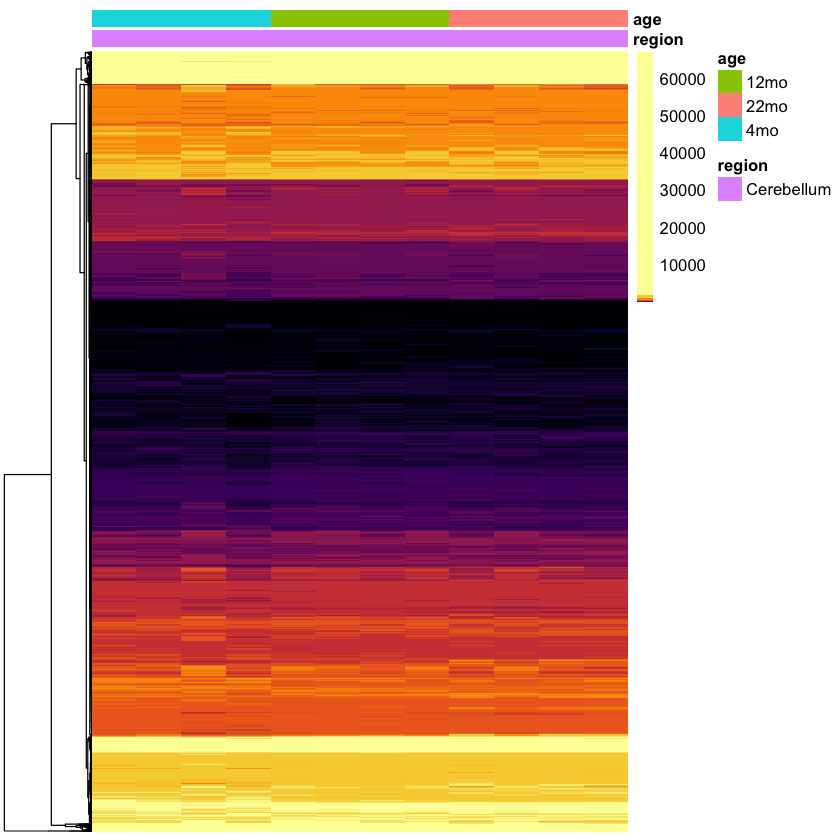

In [10]:
cerrebelum_samples = rownames(GSE62420_metadata)[GSE62420_metadata$region == "Cerebellum"]
pheatmap(GSE62420_genes[,cerrebelum_samples],
         cluster_rows=T,
         cluster_cols=F,
         show_rownames=F,
         show_colnames=F,
         breaks=breaks,
         annotation_col = GSE62420_metadata[,c("region","age")],
         color=inferno(10))

## Striatum

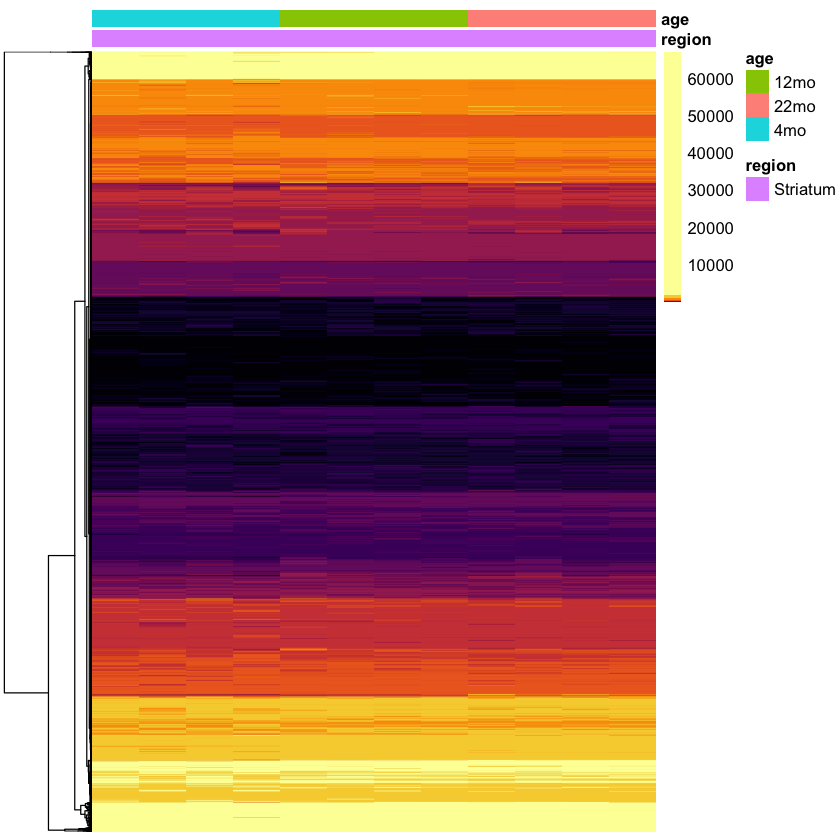

In [11]:
striatum_samples = rownames(GSE62420_metadata)[GSE62420_metadata$region == "Striatum"]
pheatmap(GSE62420_genes[,striatum_samples],
         cluster_rows=T,
         cluster_cols=F,
         show_rownames=F,
         show_colnames=F,
         breaks=breaks,
         annotation_col = GSE62420_metadata[,c("region","age")],
         color=inferno(10))

## Cortex

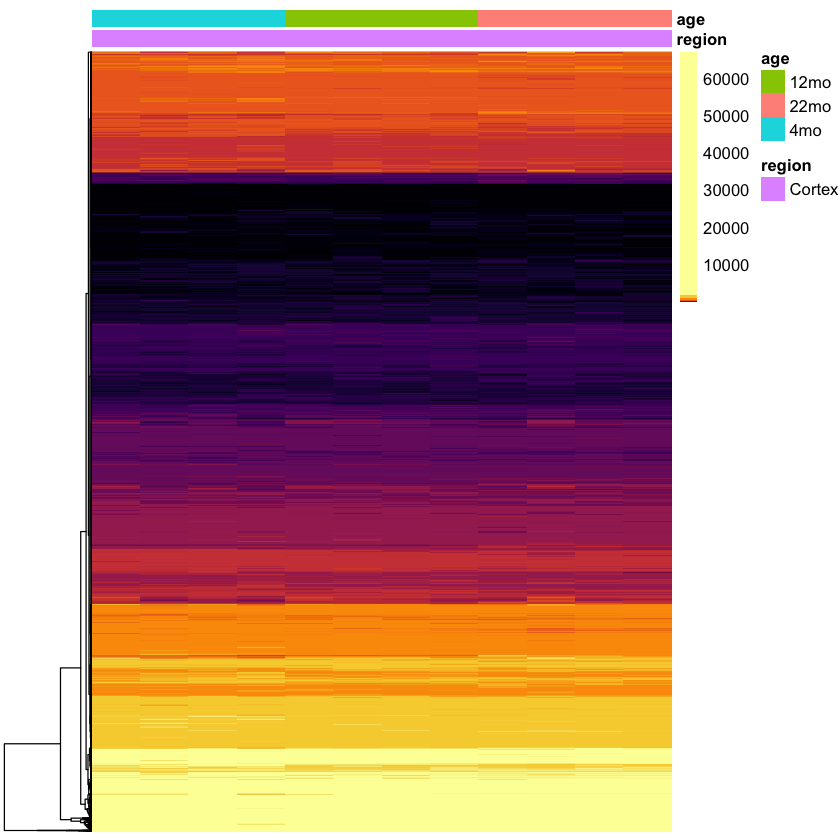

In [12]:
cortex_samples = rownames(GSE62420_metadata)[GSE62420_metadata$region == "Cortex"]
pheatmap(GSE62420_genes[,cortex_samples],
         cluster_rows=T,
         cluster_cols=F,
         show_rownames=F,
         show_colnames=F,
         breaks=breaks,
         annotation_col = GSE62420_metadata[,c("region","age")],
         color=inferno(10))

## Hippocampus

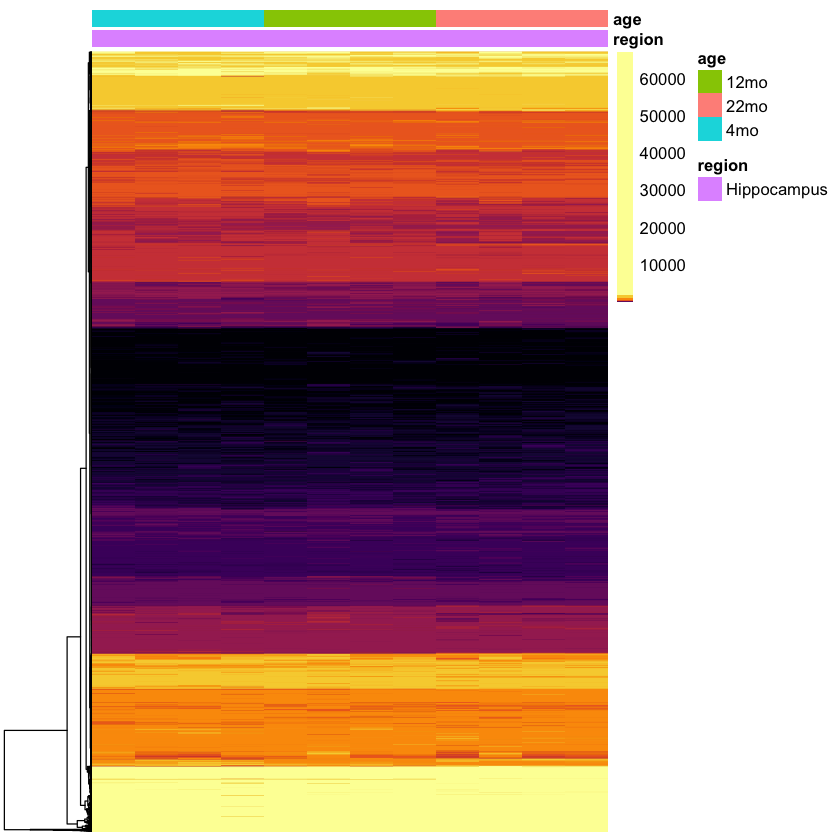

In [13]:
hippocampus_samples = rownames(GSE62420_metadata)[GSE62420_metadata$region == "Hippocampus"]
pheatmap(GSE62420_genes[,hippocampus_samples],
         cluster_rows=T,
         cluster_cols=F,
         show_rownames=F,
         show_colnames=F,
         breaks=breaks,
         annotation_col = GSE62420_metadata[,c("region","age")],
         color=inferno(10))

# Genes differentially expressed in age comparisons

To compare the things together, we need to look at genes differentially expressed for Male and SPF (not Female, not GF). We also need to plot only samples for Male and SPF.

In [14]:
age_type_gender_fc = read.table("../results/dge/age-effect/age_type_gender/fc_deg",
                                sep = "\t",
                                header = T,
                                row.names = 1)
colnames(age_type_gender_fc) = c("52w VS 8w (F, SPF)", "52w VS 8w (F, GF)", "52w VS 8w (M, SPF)", "52w VS 8w (M, GF)", "104w VS 52w (F, SPF)", "104w VS 52w (F, GF)", "104w VS 52w (M, SPF)", "104w VS 52w (M, GF)", "104w VS 8w (F, SPF)", "104w VS 8w (F, GF)", "104w VS 8w (M, SPF)", "104w VS 8w (M, GF)")
head(age_type_gender_fc)

,"52w VS 8w (F, SPF)","52w VS 8w (F, GF)","52w VS 8w (M, SPF)","52w VS 8w (M, GF)","104w VS 52w (F, SPF)","104w VS 52w (F, GF)","104w VS 52w (M, SPF)","104w VS 52w (M, GF)","104w VS 8w (F, SPF)","104w VS 8w (F, GF)","104w VS 8w (M, SPF)","104w VS 8w (M, GF)"
0610007P14Rik,NA,NA,NA,NA,NA,NA,0.2995864,0.5880348,NA,NA,NA,0.4748921
0610009B22Rik,NA,NA,NA,NA,NA,NA,0.2578338,0.5596664,-0.4851562,NA,NA,0.6158035
0610009L18Rik,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,-0.7641821,NA
0610009O20Rik,0.6702230,0.5741547,NA,NA,-0.6983277,NA,-0.7193424,NA,NA,NA,-0.8507103,-0.6901440
0610010K14Rik,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,-0.3509657,NA
0610012G03Rik,-0.3869422,-0.5346479,NA,NA,NA,0.4999983,NA,0.4632753,-0.4695134,NA,-0.3409655,NA


In [15]:
M_SPF_52w_8w_comp = "52w VS 8w (M, SPF)"
M_SPF_52w_8w_genes = rownames(age_type_gender_fc)[!is.na(age_type_gender_fc[, M_SPF_52w_8w_comp])]
length(M_SPF_52w_8w_genes)
M_SPF_104w_52w_comp = "104w VS 52w (M, SPF)"
M_SPF_104w_52w_genes = rownames(age_type_gender_fc)[!is.na(age_type_gender_fc[, M_SPF_104w_52w_comp])]
length(M_SPF_104w_52w_genes)
M_SPF_104w_8w_comp = "104w VS 8w (M, SPF)"
M_SPF_104w_8w_genes = rownames(age_type_gender_fc)[!is.na(age_type_gender_fc[, M_SPF_104w_8w_comp])]
length(M_SPF_104w_8w_genes)

[1] 367

[1] 3428

[1] 3863

In [16]:
# 52w vs 8w
M_SPF_52w_8w_fc = age_type_gender_fc[M_SPF_52w_8w_genes, M_SPF_52w_8w_comp]
names(M_SPF_52w_8w_fc) = M_SPF_52w_8w_genes
M_SPF_52w_8w_fc = M_SPF_52w_8w_fc[order(M_SPF_52w_8w_fc)]
M_SPF_52w_8w_genes = names(M_SPF_52w_8w_fc)
# 104w vs 52w
M_SPF_104w_52w_fc = age_type_gender_fc[M_SPF_104w_52w_genes, M_SPF_104w_52w_comp]
names(M_SPF_104w_52w_fc) = M_SPF_104w_52w_genes
M_SPF_104w_52w_fc = M_SPF_104w_52w_fc[order(M_SPF_104w_52w_fc)]
M_SPF_104w_52w_genes = names(M_SPF_104w_52w_fc)

In [17]:
# Samples
M_SPF_samples = c('SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2',
            'SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2',
            'SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2')
M_SPF_metadata = t(sapply(sapply(M_SPF_samples, strsplit, split = "_"), unlist))
M_SPF_metadata = M_SPF_metadata[,-5]
colnames(M_SPF_metadata) = c("type", "age", "gender", "replicate")
M_SPF_metadata

,type,age,gender,replicate
SPF_8w_M_1_2,SPF,8w,M,1
SPF_8w_M_2_2,SPF,8w,M,2
SPF_8w_M_3_2,SPF,8w,M,3
SPF_8w_M_4_2,SPF,8w,M,4
SPF_52w_M_1_2,SPF,52w,M,1
SPF_52w_M_2_2,SPF,52w,M,2
SPF_52w_M_3_2,SPF,52w,M,3
SPF_52w_M_4_2,SPF,52w,M,4
SPF_52w_M_5_2,SPF,52w,M,5
SPF_104w_M_1_2,SPF,104w,M,1


In [18]:
annot = as.data.frame(M_SPF_metadata[,"age"])
colnames(annot) = c("age")

## 52w vs 8w

In [19]:
# Genes that are differentially expressed in 52w vs 8w and also found with the Affymetrix probes
M_SPF_52w_8w_GSE62420_genes = M_SPF_52w_8w_genes[M_SPF_52w_8w_genes %in% rownames(GSE62420_genes)]

Affymetrix data

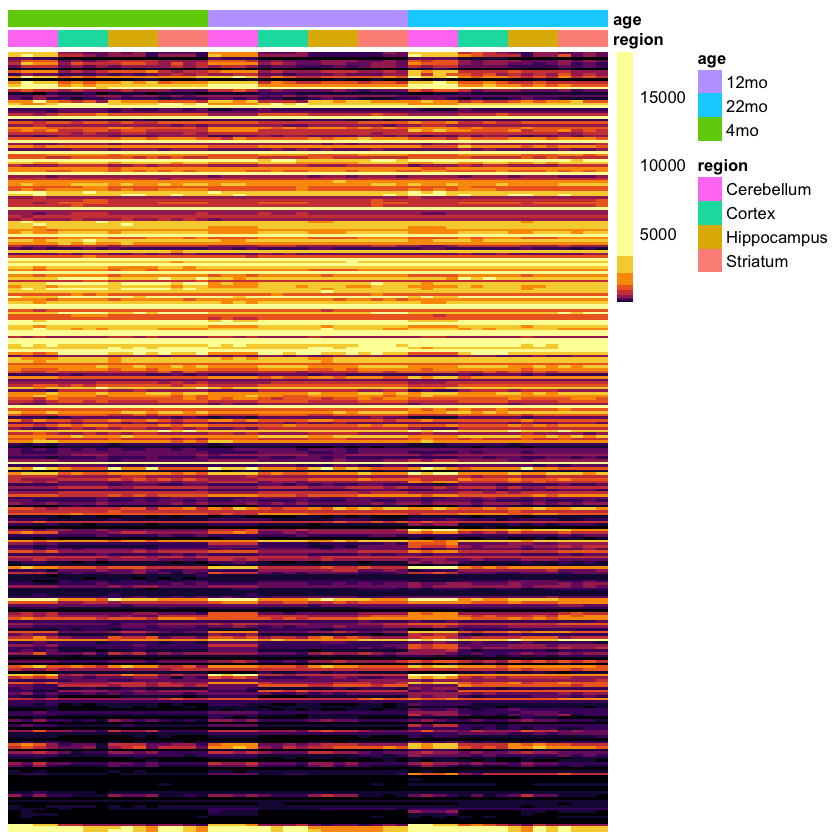

In [20]:
plot_heatmap(GSE62420_genes,
             M_SPF_52w_8w_GSE62420_genes,
             colnames(GSE62420_genes),
             GSE62420_metadata[,c("region","age")])

Our data

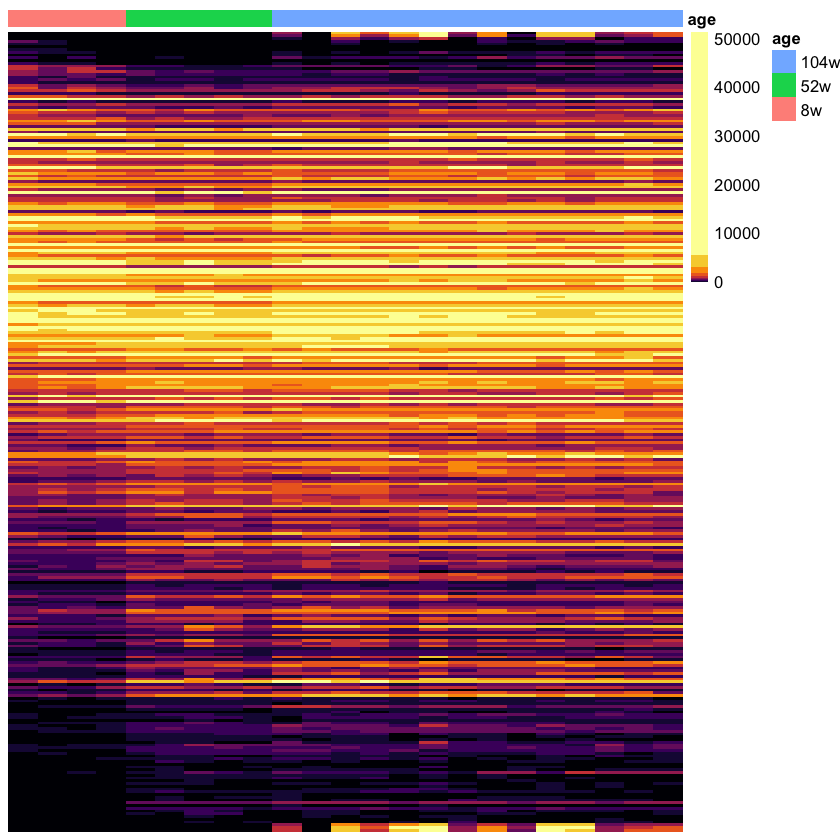

In [21]:
plot_heatmap(norm_counts,
             M_SPF_52w_8w_GSE62420_genes,
             M_SPF_samples,
             annot)

## 104w vs 8w

In [22]:
# Genes that are differentially expressed in 104w vs 52w and also found with the Affymetrix probes
M_SPF_104w_52w_GSE62420_genes = M_SPF_104w_52w_genes[M_SPF_104w_52w_genes %in% rownames(GSE62420_genes)]

Affymetrix data

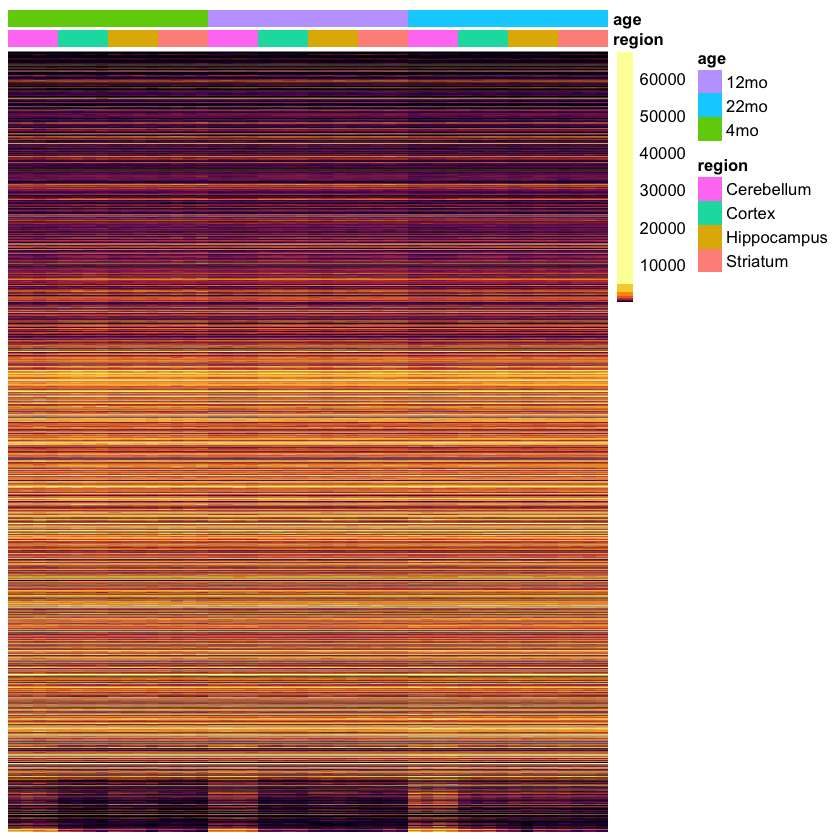

In [23]:
plot_heatmap(GSE62420_genes,
             M_SPF_104w_52w_GSE62420_genes,
             colnames(GSE62420_genes),
             GSE62420_metadata[,c("region","age")])

Our data

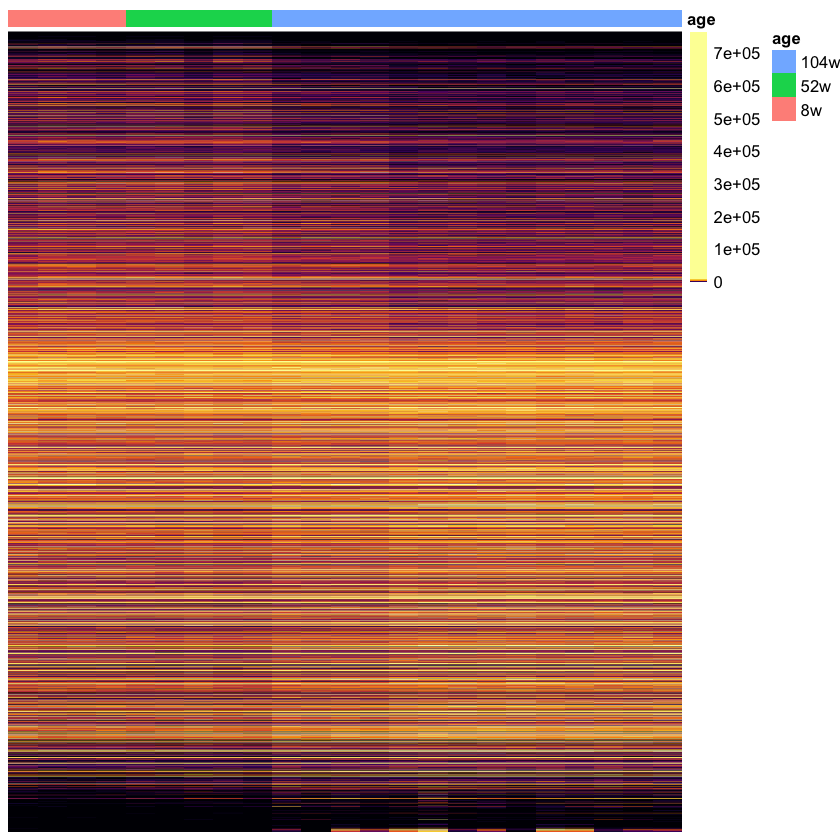

In [24]:
plot_heatmap(norm_counts,
             M_SPF_104w_52w_GSE62420_genes,
             M_SPF_samples,
             annot)

# DEG analysis of Grabert data

## On the normalized Affymetrix data

In [25]:
GSE62420_metadata$age = factor(GSE62420_metadata$age)
GSE62420_metadata$age = relevel(GSE62420_metadata$age, "4mo")
GSE62420_design = model.matrix(~ 0 + age, GSE62420_metadata)
GSE62420_fit = lmFit(GSE62420, GSE62420_design)
GSE62420_contrasts = makeContrasts(age12mo-age4mo, age22mo-age4mo, age22mo-age12mo, levels = GSE62420_design)
GSE62420_fit_cont = contrasts.fit(GSE62420_fit, GSE62420_contrasts)
GSE62420_fit_cont_ebayes = eBayes(GSE62420_fit_cont)
#GSE62420_efit = eBayes(GSE62420_fit)

Differentially expressed genes

In [26]:
age_12mo_4mo = topTable(GSE62420_fit_cont_ebayes,
         coef = "age12mo - age4mo",
         sort = "logFC",
         number = Inf,
         adjust.method = "BH",
         p.value = 0.05)
dim(age_12mo_4mo)
age_22mo_4mo = topTable(GSE62420_fit_cont_ebayes,
         coef = "age22mo - age4mo",
         sort = "logFC",
         number = Inf,
         adjust.method = "BH",
         p.value = 0.05)
dim(age_22mo_4mo)
age_22mo_12mo = topTable(GSE62420_fit_cont_ebayes,
         coef = "age22mo - age12mo",
         sort = "logFC",
         number = Inf,
         adjust.method = "BH",
         p.value = 0.05)
dim(age_22mo_12mo)

[1] 4468    6

[1] 8091    6

[1] 2014    6

## On the aggregated normalized counts with gene symbols

In [27]:
GSE62420_metadata$age = factor(GSE62420_metadata$age)
GSE62420_metadata$age = relevel(GSE62420_metadata$age, "4mo")
GSE62420_design = model.matrix(~ 0 + age, GSE62420_metadata)
GSE62420_fit = lmFit(GSE62420_genes, GSE62420_design)
GSE62420_contrasts = makeContrasts(age12mo-age4mo, age22mo-age4mo, age22mo-age12mo, levels = GSE62420_design)
GSE62420_fit_cont = contrasts.fit(GSE62420_fit, GSE62420_contrasts)
GSE62420_fit_cont_ebayes = eBayes(GSE62420_fit_cont)
#GSE62420_efit = eBayes(GSE62420_fit)

### Differentially expressed genes

In [28]:
age_12mo_4mo = topTable(GSE62420_fit_cont_ebayes,
         coef = "age12mo - age4mo",
         sort = "none",
         number = Inf,
         adjust.method = "BH")
sum(age_12mo_4mo$adj.P.Val < 0.05)
head(age_12mo_4mo)
age_22mo_4mo = topTable(GSE62420_fit_cont_ebayes,
         coef = "age22mo - age4mo",
         sort = "none",
         number = Inf,
         adjust.method = "BH")
sum(age_22mo_4mo$adj.P.Val < 0.05)
head(age_22mo_4mo)
age_22mo_12mo = topTable(GSE62420_fit_cont_ebayes,
         coef = "age22mo - age12mo",
         sort = "none",
         number = Inf,
         adjust.method = "BH")
sum(age_22mo_12mo$adj.P.Val < 0.05)
head(age_22mo_12mo)

[1] 1219

,logFC,AveExpr,t,P.Value,adj.P.Val,B
0610005C13Rik,0.2923643,11.44471,0.6880889,0.4948865208,0.748003010,-5.1222913
0610007P14Rik,-40.8188048,450.35423,-3.8333345,0.0003857736,0.009125298,-0.5465936
0610009B22Rik,-33.0278734,833.17133,-1.0992956,0.2774159649,0.564640442,-4.8440188
0610009O20Rik,10.9428852,191.68853,1.2106485,0.2322751736,0.513309461,-4.7479182
0610012G03Rik,-31.0309912,1837.60467,-0.3426477,0.7334398830,0.883198357,-5.2590949
0610037L13Rik,17.6482226,665.97456,0.7950895,0.4306853791,0.705725949,-5.0617392


[1] 3070

,logFC,AveExpr,t,P.Value,adj.P.Val,B
0610005C13Rik,0.1384301,11.44471,0.3257998,0.746067950,0.85683788,-5.263444
0610007P14Rik,-4.8370325,450.35423,-0.4542505,0.651805952,0.79437896,-5.224800
0610009B22Rik,-60.1391303,833.17133,-2.0016633,0.051298576,0.14903852,-3.832559
0610009O20Rik,-10.2357886,191.68853,-1.1324200,0.263384456,0.46207249,-4.816332
0610012G03Rik,85.6746868,1837.60467,0.9460294,0.349125674,0.55090975,-4.962034
0610037L13Rik,-61.0672309,665.97456,-2.7512072,0.008491566,0.03873607,-2.644223


[1] 1184

,logFC,AveExpr,t,P.Value,adj.P.Val,B
0610005C13Rik,-0.1539342,11.44471,-0.3622890,0.7188116974,0.89344991,-5.253750
0610007P14Rik,35.9817722,450.35423,3.3790840,0.0014992620,0.02296144,-1.469165
0610009B22Rik,-27.1112569,833.17133,-0.9023677,0.3716090843,0.68061233,-4.992578
0610009O20Rik,-21.1786739,191.68853,-2.3430684,0.0235503281,0.15427481,-3.325046
0610012G03Rik,116.7056780,1837.60467,1.2886771,0.2040178775,0.51821019,-4.675493
0610037L13Rik,-78.7154534,665.97456,-3.5462967,0.0009177709,0.01607026,-1.135421


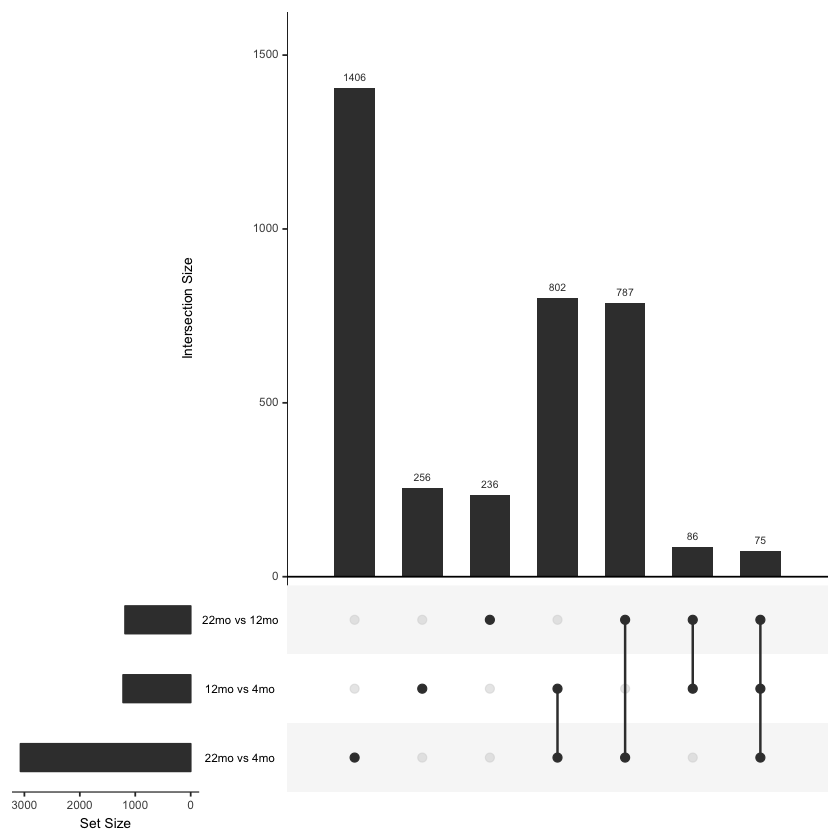

In [29]:
affy_df = data.frame("12mo vs 4mo" = age_12mo_4mo$adj.P.Val,
                     "22mo vs 4mo" = age_22mo_4mo$adj.P.Val,
                     "22mo vs 12mo" = age_22mo_12mo$adj.P.Val)
colnames(affy_df) = c("12mo vs 4mo", "22mo vs 4mo", "22mo vs 12mo")
rownames(affy_df) = rownames(age_12mo_4mo)
affy_sign_df = (affy_df<0.05)*1
upset(as.data.frame(affy_sign_df), nsets = 12, nintersects=50)

### Comparison with our differentially expressed genes

In [30]:
all_df = cbind(affy_sign_df,
               as.integer(rownames(affy_sign_df) %in% M_SPF_52w_8w_genes),
               as.integer(rownames(affy_sign_df) %in% M_SPF_104w_52w_genes),
               as.integer(rownames(affy_sign_df) %in% M_SPF_104w_8w_genes))
colnames(all_df) = c(paste(colnames(affy_sign_df), "(Grabert et al)"), "52w vs 8w", "104w vs 52w", "104w vs 8w")
dim(all_df)
# add genes that are not in Grabert et al
M_SPF_genes = unique(c(M_SPF_52w_8w_genes,M_SPF_104w_52w_genes,M_SPF_104w_8w_genes))
M_SPF_genes = M_SPF_genes[!M_SPF_genes %in% rownames(all_df)]
extra = cbind(rep(0, length(M_SPF_genes)),
              rep(0, length(M_SPF_genes)),
              rep(0, length(M_SPF_genes)),
              as.integer(M_SPF_genes %in% M_SPF_52w_8w_genes),
              as.integer(M_SPF_genes %in% M_SPF_104w_52w_genes),
              as.integer(M_SPF_genes %in% M_SPF_104w_8w_genes))
rownames(extra) = M_SPF_genes
all_df = rbind(all_df, extra)
dim(all_df)

[1] 13010     6

[1] 14244     6

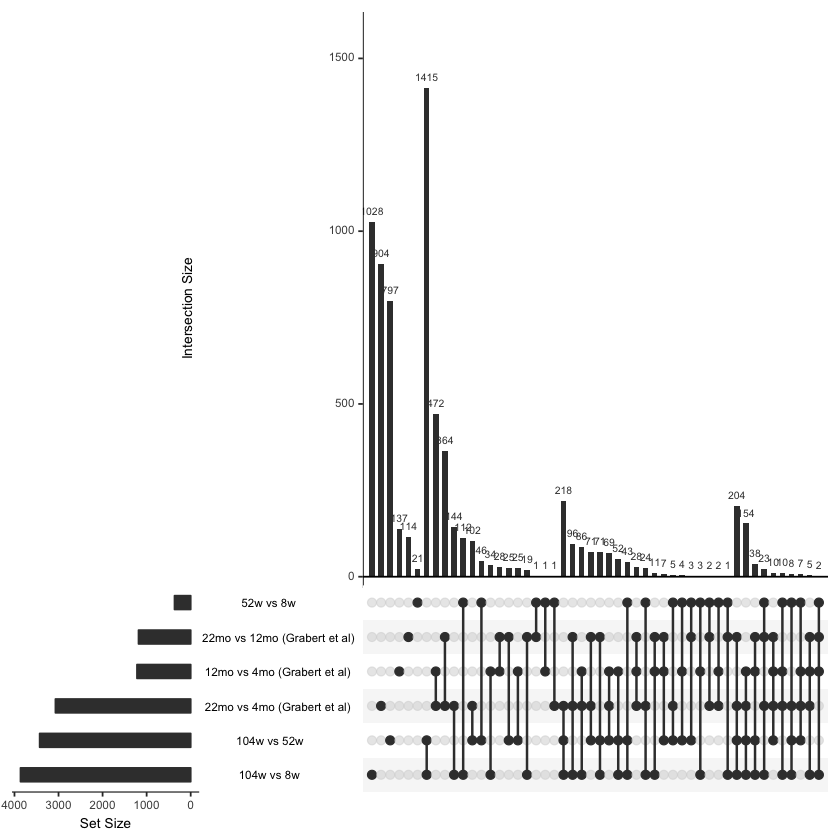

In [31]:
upset(as.data.frame(all_df), nsets = 12, nintersects=50)

In [45]:
age_22mo_12mo_in_our = rownames(age_type_gender_fc) %in% rownames(age_22mo_12mo)
data = cbind(age_22mo_12mo[rownames(age_type_gender_fc)[age_22mo_12mo_in_our],"logFC"],
             age_type_gender_fc[age_22mo_12mo_in_our,])
colnames(data) = c("Grabert_age_22mo_12mo", colnames(age_type_gender_fc))
write.table(data,
            "../results/dge/grabert_comparison/log2fc_of_age_22mo_vs_12mo_deg",
            sep = "\t",
            quote = FALSE,
            row.names = TRUE)